In [1]:
%matplotlib widget
import sys
sys.path.append("/u/yali/script/Plots")
from Plots import plot_static
from plot_static import plot_single
from Plots import plot_animate
from plot_animate import plots
import numpy as np
import matplotlib.pyplot as plt
import h5py

r_i = 0.25; r_o = 25;  p = -1;  M_disk = 0.1; M_star = 1.0
G = 39.4429
UnitLength_in_cm = 1.496e13     
UnitMass_in_g = 1.989e33        
UnitVelocity_in_cm_per_s = 474318.3259 
k_B = 1.38064852e-23/((UnitVelocity_in_cm_per_s/100)**2 * (UnitMass_in_g/1000))   # 1.38064852e-23 m2 kg s-2 K-1
proton_mass = 1.6726219e-27/(UnitMass_in_g/1000);  mu = 2.3;     mean_molecular_weight = mu * proton_mass
r0 = 1.0
Sigma_0 = M_disk*(p+2) /(2.0*np.pi*r0)/((r_o/r0)**(p+2)-(r_i/r0)**(p+2))
#AR_for_normalize = 0.1
q = -0.5

# Initial Condition Verification

In [3]:
a = plot_single("gDisk1","", 0)
cs = np.sqrt(a.intE*(5./3.-1)/a.dens)
h_r = cs/(a.velx**2 + a.vely**2)**0.5
#a.scatter_qty("3d", "dens")
#fig = plt.figure(figsize = (10, 10))
#ax = fig.add_subplot(111, projection='3d')
#ax.view_init(elev=40., azim=40.)
#ax.scatter(a.coordx[a.coordy > 50], a.coordy[a.coordy > 50], a.coordz[a.coordy > 50], s = 0.005)#, c =  a.dens)
#ax.scatter(a.coordx[(a.phi<0.1)&(a.phi>-0.1)], a.coordy[(a.phi<0.1)&(a.phi>-0.1)], a.coordz[(a.phi<0.1)&(a.phi>-0.1)], s = 0.05)
#ax.scatter(a.coordx, a.coordy, a.coordz, s = 0.01)
#ax.set_zlim(48, 52)
#plt.scatter(a.coordx[a.coordy > 50], a.coordz[a.coordy > 50], s = 0.8, c = a.dens[a.coordy > 50])
#plt.colorbar()
#plt.xlim(50, 70)
#plt.ylim(49, 69)
#a.scatter_qty("xy", "temp")
#plt.scatter(a.rad, a.vel_mag/(a.Omega_K*a.rad))#a.AspectRatio)
plt.figure(figsize = (8, 8))
#plt.yscale("log")
omega = (G*M_star/a.rad**3)**0.5
c_s =  (k_B/mean_molecular_weight * a.temp)**0.5
Q = c_s*omega/(np.pi*G*(Sigma_0 * (a.rad/r0)**p))
#plt.scatter(a.rad, a.height, s=0.4, label = "velocity of particles") #c = a.temp)
#plt.scatter(a.coordx,a.coordy, s = 0.2)
#plt.scatter(a.rad, a.temp, s = 0.4)
#plt.scatter(a.rad, Q)
dots = np.linspace(0.1, 25)
#plt.ylim(0, 0.2)
r = np.linspace(0.5, 2, 100)
y = r**(-0.5)*(0.1*np.sqrt(G*M_star/1**3))**2/(k_B/mean_molecular_weight)
#plt.plot(x, (x/r_o)**(-3/4)*2,"black")
#plt.title("Temperature profile")
#plt.plot(r, y, "g", label = "expectation")
#plt.plot(x, np.sqrt(G*M_star/x), 'g', label = "Keplerian velocity")
#plt.legend()
#plt.colorbar()
folder = "gDisk1"
fname = str(format(0, "03d"))
f = h5py.File("/u/yali/"+folder+"/test/output_0.01/snapshot_"+fname+".hdf5", 'r')
coord = f['PartType0']['Coordinates'][:,:]; x = coord[:,0]; y = coord[:,1]; z = coord[:,2]
r = ((x-50)**2 + (y-50)**2)**0.5
ids = f['PartType0']['ParticleIDs'][:]
temp = (mean_molecular_weight/k_B) * (1.0001-1) * f['PartType0']['InternalEnergy'][:]
vel = f['PartType0']['Velocities'][:,:]; vx = coord[:,0]; vy = coord[:,1]; vz = coord[:,2]
c_s =  (k_B/mean_molecular_weight * a.temp)**0.5
omega = vy/(x-50)
#omega = np.sqrt(G/r**3)*((1+q) - q*r/(r**2+(z-50)**2)**0.5 + (p-(3+q)/2+q) * vAR(r_g)**2)**0.5
print(vy[omega == max(omega)])
plt.scatter(r, omega, s = 0.4)
plt.plot(dots, np.sqrt(G/dots**3))

##################### surface density plot ###############################################
bins = 100
N, r_bins = np.histogram(a.rad, bins=bins)
r_center = (r_bins[1:] + r_bins[0:-1])/2
dr = r_bins[[1]] - r_bins[[0]]

sig = N*M_disk/len(a.rad)/(2*np.pi*r_center*dr)
#print(len(r_center))
#print(len(sig))
#plt.scatter(r_center, sig)
#plt.ylim(0.00001, 0.3)
##########################################################################################
plt.xlim(0,25)
plt.ylim(0, 100000)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

[51.439438]


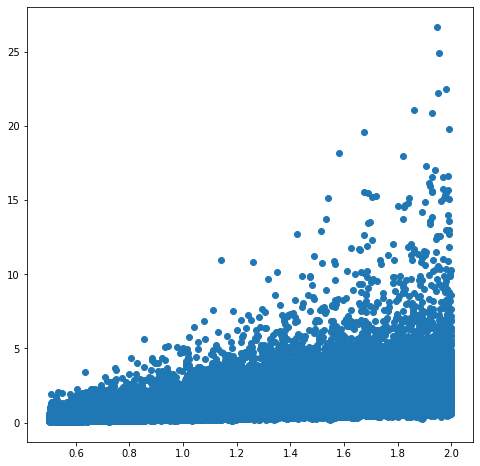

In [41]:
a = plot_single("Disk_small","", 0)
cs = np.sqrt(a.intE*(1.0001-1)/a.dens)
h_r = cs/(a.velx**2 + a.vely**2)**0.5
plt.figure(figsize = (8, 8))
plt.scatter(a.rad, h_r)

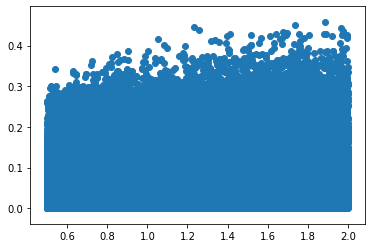

In [29]:
plt.scatter(a.rad, np.abs(a.height)/a.rad)

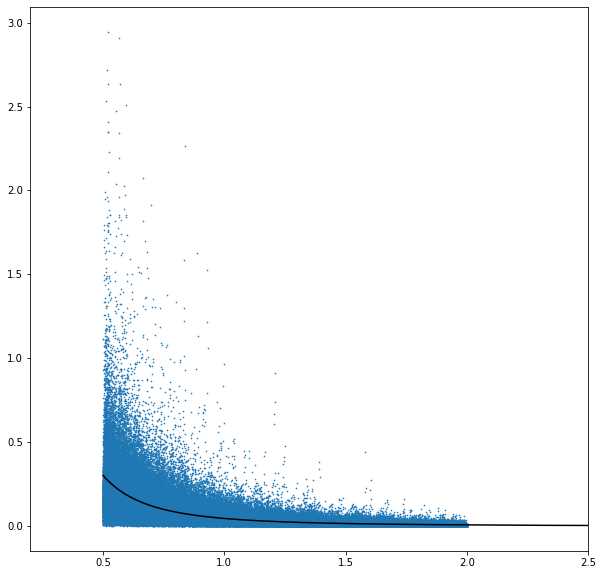

In [11]:
#a.scatter_qty("xy", "temp")
#a.qty_qty("rad", "specAngMom")
plt.figure(figsize = (10, 10))
plt.scatter(a.rad, a.dens, s =0.4)
r = np.linspace(0.5, 2.5, 200)

def midp(r):
    Q_for_normalize = 2.828         # Q = c_s*Omega/(np.pi*G*Sigma), normalised s.t. Q(r=r_o) = Q_for_normalize 
    def Temp(r):
        res =  (AR_for_normalize*r0 *Omega_K(r0))**2/(k_B*(r0/r0)**q/mean_molecular_weight) *  (r/r0)**q
        res[(r < r_i) | (r > r_o)] = 200
        return res
    def c_s(r):                 # speed of sound
        return (k_B * Temp(r)/mean_molecular_weight)**0.5     
    def Omega_K(r):             # Keplerian angular speed
        return (G*0.1/r**3)**0.5 
    def vertical_scale_h(r):
        return c_s(r) / Omega_K(r)
    return Sigma_0*r**p/(vertical_scale_h(r)*(2*np.pi)**0.5)

plt.plot(r, midp(r), "black")
plt.xlim(0.2, 2.5)
#plt.ylim(0, 2)
#r = np.linspace(4, 20, 100)
#plt.plot(r, np.sqrt(a.GravityConstantInternal*a.m_star*r), "y", linewidth = 3)
plt.show()

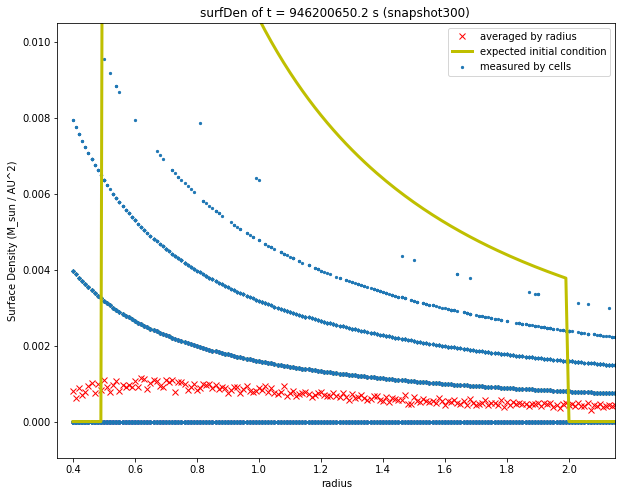

In [5]:
a = plot_single("gDisk1","", 300)
a.grid_qty("surfDen","radial")

[ 82871  78437 106020  76315 159843 157983  50919  38173 131244  63580
  81861  43249   8421 174374 131758  20246  76907  65819  84577  96961
  68680  69634   5554  65729 120576  85947 153826  30599 142252   1781
 194275  37534  41016 100822  17642 194165 197715  66817  96340  41128
 186809 134884  29978 188368  41254  65621  72868  50910]


(48, 52)

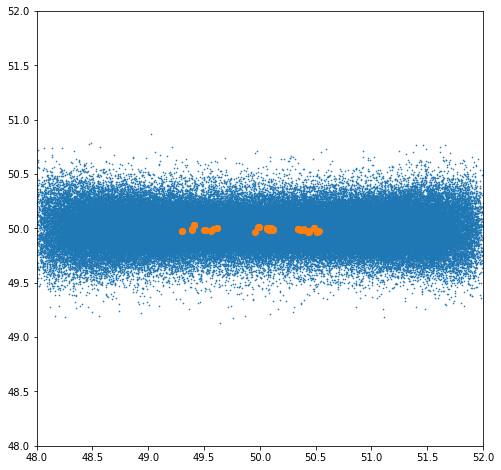

In [4]:
#a.grid_qty("Toomre", "radial")
#a.scatter_qty("rz", "vel_mag")
#plt.scatter(a.rad, a.vel_mag)
plt.figure(figsize = (8, 8))
plt.scatter(a.coordx, a.coordz, s = 0.4)
plt.scatter(a.coordx[a.dens > 1.5], a.coordz[a.dens > 1.5])
print(a.ids[a.dens > 1.5])
plt.xlim(48, 52)
plt.ylim(48, 52)

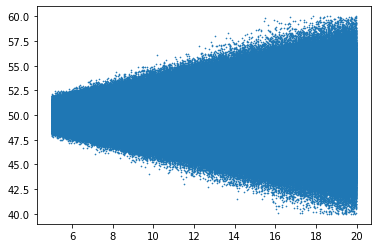

In [59]:
#cur = plot_single("gDisk1","", 40)
#cur.grid_qty("surfDen", "xy")
plt.scatter(a.rad, a.coordz, s = 0.4)
#plt.yscale("log")
#plt.ylim(0., 0.0001)

In [ ]:
c = plots("gDisk1")

Text(0.5, 1.0, 'Acceleration by gravitaional potential of central star')

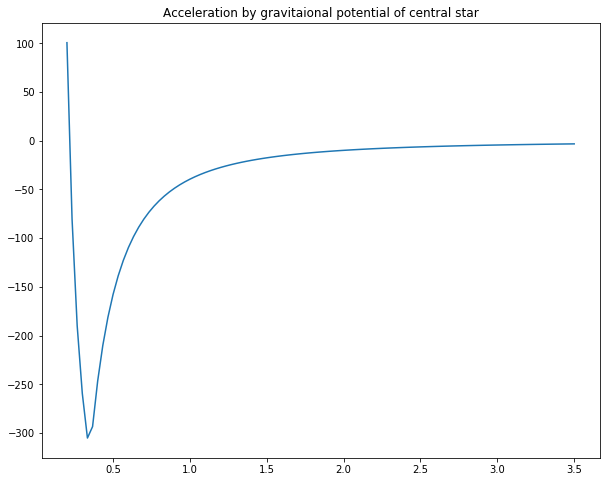

In [48]:
# 2d Keplerian Disk gravity setup

import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0.2, 3.5, 100)
res = []
for a in x:
    if a < 0.35:
        res.append(G*1/a**2*(1-a/0.35-(a/0.35)**2))
    #elif a > 2.1:
    #    res.append(-1/a**2*(1+(a-2.1)/0.1))
    else:
        res.append(-G/a**2)
plt.figure(figsize = (10, 8))
plt.plot(x, res)
plt.title("Acceleration by gravitaional potential of central star")

In [ ]:
#plot2d.make_video("gDisk1", 2, "rad", "temp")


#from Plots import ytplot
#from Plots import ipvplot
#from ipywebrtc import VideoRecorder

 # optionally, we can record the v ideo
    #rec = MediaRecorder(stream=fig)
    #
    #rec.record = False
    
    # record video
#recorder = VideoRecorder(stream=fig)
#recorder 
    
    #recorder.save()
    #ipv.save('viz-3d-stream.html')
    
    #with open('viz-3d-stream.webm', 'wb') as f:
    #    f.write(rec.data)